# Train and Analyze a Network Intrusion Detection Model

<b> Download and load the dataset </b>

In [1]:
# import packages
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import plot_partial_dependence
from mlxtend.evaluate import feature_importance_permutation
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

In [2]:
# url path
url_path = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter09/Dataset/KDDCup99.csv'

In [3]:
df = pd.read_csv(url_path)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


<b> Extract the response variable </b>

In [4]:
y = df.pop('label')

In [5]:
# perform one-hot encoding
df = pd.get_dummies(df)

<b> Split the dataset into training and test sets </b>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=1)

<b> Create a function that will instantiate and fit RandomForestClassifier </b>

In [7]:
rf_model = RandomForestClassifier(random_state=168)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=168)

<b> Create a function that will predict the outcome for the training and testing sets </b>

In [9]:
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

<b> Create a function that will print the accuracy score for the training and testing sets </b>

In [10]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
print(f'Accuracy on train set: {train_acc}')
print(f'Accuracy on test set: {test_acc}')

Accuracy on train set: 0.9999971082720769
Accuracy on test set: 0.999709863298382


<b> Compute the feature importance via permutation and display it on a bar chart </b>

In [11]:
imp_vals, _ = feature_importance_permutation(predict_method=rf_model.predict,
                                            X=X_train.values,
                                            y=y_train.values,
                                            metric='accuracy',
                                            num_rounds=1,
                                            seed=2)

imp_vals

array([8.67518377e-06, 8.06792091e-04, 3.47007351e-05, 0.00000000e+00,
       7.22931981e-05, 2.89172792e-06, 3.15198344e-04, 0.00000000e+00,
       4.91593747e-05, 2.89172792e-06, 2.89172792e-06, 0.00000000e+00,
       0.00000000e+00, 1.15669117e-05, 2.89172792e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.89172792e-06, 4.62676468e-05,
       5.49428305e-05, 2.89172792e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.89172792e-06, 5.78345585e-06, 2.02420955e-05,
       4.62676468e-05, 2.51580329e-04, 3.75924630e-05, 2.89172792e-05,
       1.21452573e-04, 1.43140532e-03, 2.02420955e-05, 1.44586396e-05,
       1.15669117e-05, 0.00000000e+00, 1.44586396e-05, 1.15669117e-05,
       5.78345585e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.89172792e-06, 5.78345585e-06,
      

In [12]:
perm_varimp = pd.DataFrame()
perm_varimp['feature'] = X_train.columns
perm_varimp['importance'] = imp_vals
perm_varimp.head()

,feature,importance
0,duration,0.000009
1,src_bytes,0.000807
2,dst_bytes,0.000035
3,land,0.000000
4,wrong_fragment,0.000072


In [13]:
perm_varimp.sort_values('importance', ascending=False, inplace=True)
perm_varimp.head()

,feature,importance
33,dst_host_srv_diff_host_rate,0.001431
1,src_bytes,0.000807
6,hot,0.000315
29,dst_host_srv_count,0.000252
32,dst_host_same_src_port_rate,0.000121


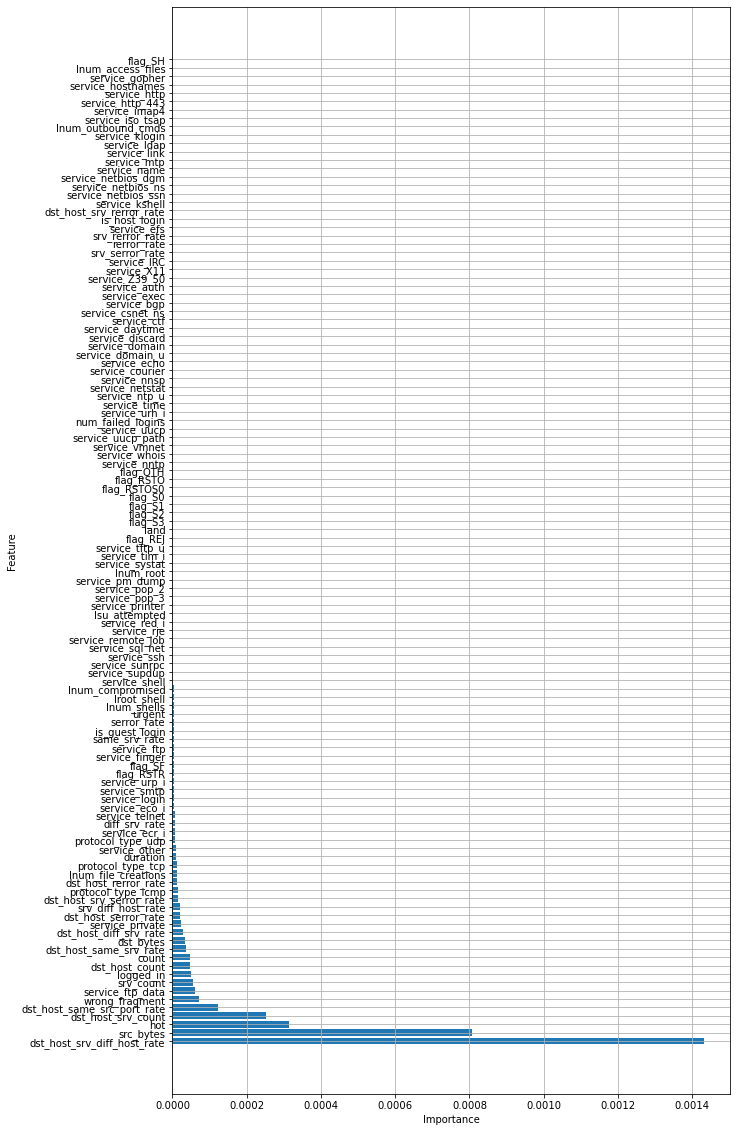

In [19]:
plt.figure(figsize=(10, 20))
plt.barh(perm_varimp['feature'], perm_varimp['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show()

<b> Plot the partial dependence plot on the src_bytes variable </b>

In [15]:
feature_index = df.columns.get_loc('src_bytes')

In [ ]:
plot_partial_dependence(rf_model,
                       X_train,
                       features=[feature_index],
                       feature_names=X_train.columns,
                       target='normal',
                       response_method='predict_proba',
                       n_jobs=-1)

<b> Perform a LIME analysis on row 99893</b>

In [ ]:
class_names = sorted(y.unique())

In [ ]:
lime_explainer = LimeTabularExplainer(X_train.values,
                                      feature_names=X_train.columns,
                                     class_names=class_names,
                                     mode='classification')

In [ ]:
exp = lime_explainer.explain_instance(X_test.iloc[99893],
                                     rf_model.predict_proba,
                                     num_features=50,
                                     top_labels=1)

exp.show_in_notebook()